Assignment 1 – Using NLTK and Vader Sentiment Analysis
Lina Botero 

In this assignment you will be using NLTK, PyPDF2, py-readability-metrics and wordcloud to compare two
news stories on the same topic, from two different sources. Complete your analysis and commentary in
a Jupyter notebook. 
The notebook should be pushed to your personal Github class repository and a URL
to the notebook submitted for the assignment of Canvas
1. Install PyPDF2 and py-readability-metrics
2. In a new notebook, import nltk and run the following commands:
a. nltk.download(‘punkt’)
b. nltk.download(‘stopwords’)
c. nltk.download(‘vader_lexicon’)
3. Read the two news stories found in this assignment on Canvas. In a markdown cell in your
notebook, briefly characterize the issue at hand and your impressions from a news reporting
objectivity perspective.
4. Use PyPDF2 to extract the text out of each document
a. Display the text
b. Briefly note any anomalies in your notebook
5. Use NLTK to complete sentiment analysis for each of the articles
a. Compare the results from the two articles
b. Compare the results to your reading of the articles; do you agree with the outcome?
6. Run sentiment analysis on the article headlines
a. Do those results agree with the overall sentiment?
7. Using py-readability-metrics complete 2-3 different readability scores
a. Discuss what the chosen metric is measuring
b. Compare the scores from both articles
8. Using wordcloud, create word clouds for both articles
a. Briefly comment on the word clouds


In [7]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linambotero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linambotero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/linambotero/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

My Analysis:

Article 1 Title: Harvard president will submit dissertation edits after plagiarism allegations
Written by: Reuters

The article talks about Claudine Gay and some plaigarism accusations she is dealing with summed to the pressure of resigning after her testimony at a congressional hearing. 

It was my impression that this article is very neutral, reporting the issue and trying to explain its causes and history behind it. 

Article 2 Title: Embattled Harvard University President Claudine Gay hit with more plagiarism charges
Written by: Fox News

The article covers the same news but the way it is written makes it seem like they are very against Gay and support these allegations. It didn't seem as a neutral news report. 

In [25]:
import PyPDF2
def extract_text_from_pdf(pdf_file):
    with open(pdf_file, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        text = ''
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

reuters = extract_text_from_pdf('reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf')
foxnews = extract_text_from_pdf('foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf')

print(reuters)
print(foxnews)


1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

In the question above, there are some text anomalies I can't get rid of, like some numbers inside the text and some text that looks like a URL. Also, there are some Ads inside the text as well and some "Scroll to continue" messages. 

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

reuters_sentiment = sid.polarity_scores(reuters)
foxnews_sentiment = sid.polarity_scores(foxnews)

print("Reuters Article:", reuters_sentiment)
print("Fox News Article:", foxnews_sentiment)

Reuters Article: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Fox News Article: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


Reuters Article analysis shows that the text has predominantly neutral sentiment, with a small amount of negative sentiment being higher than the positive sentiment. 
Fox News Article analysis suggests that the text has predominantly neutral sentiment, with almost the same amount of positive sentiment compared to negative sentiment. 

Comparing this to the reading I made of the texts, it is a very different analysis. In general, in the Reuters article, I had the perception of it being much more neutral and the Sid Polarity stated that even if it is neutral, the Fox News Article is even more neutral with similar positive and negative sentiment. So, even though I do agree with the Reuters Article Outcome, I don't agree with the Fox News Article Outcome. I think one possible reason, as we saw in class, to explain this is the specific word choices they used to write the article, making it seem like a neutral article when the meaning is another. 

In [18]:
sid = SentimentIntensityAnalyzer()

reutersheadline = sid.polarity_scores('Harvard president will submit dissertation edits after plagiarism allegations')
foxnewsheadline = sid.polarity_scores('Embattled Harvard University President Claudine Gay hit with more plagiarism charges')

print("Reuters Headline:", reutersheadline)
print("Fox News Headline:", foxnewsheadline)

Reuters Headline: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Fox News Headline: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


The Headline sentiment analysis alligns a bit more with what I originally thought of the sentiment of these articles.We can now see that the Reuters Sentiment Analysis is it being completely neutral. In the Fox News Article Headline we also see some mayority of neutral sentiment, but we also have some negative sentiment as well, and NO positive sentiment. These results vary from the complete-text sentiment analysis. 

In [23]:
from readability import Readability

readability1 = Readability(reuters)
readability2 = Readability(foxnews)

flesch1 = readability1.flesch().score
flesch2 = readability2.flesch().score

print("Flesch Reading Ease Score for Reuters Article:", flesch1)
print("Flesch Reading Ease Score for Fox News Article:", flesch2)

Flesch Reading Ease Score for Reuters Article: 15.643355834136969
Flesch Reading Ease Score for Fox News Article: 21.02957027300306


The Flesch Reading Ease gives articles a score between 1 and 100, the higher the score is, the easier that text is to read. 100 would be the score for a children's book. 
We can see the Fox News Article is easier to read than the Reuters article, both of them being difficult in general to read. 

In [24]:
def compute_coleman_liau_index(text, title):
    readability = Readability(text)
        coleman_liau = readability.coleman_liau().score
        return coleman_liau

coleman_liau_reuters = compute_coleman_liau_index(reuters, "Reuters Article")
print("Coleman-Liau for Reuters:", coleman_liau_reuters)

coleman_liau_fox_news = compute_coleman_liau_index(foxnews, "Fox News Article")
print("Coleman-Liau for Fox News:", coleman_liau_fox_news)

Coleman-Liau Index for Reuters Article: 15.468123861566479
Coleman-Liau Index for Fox News Article: 13.512604651162789


The Coleman-Liau Index captures the understandability of the text. The Index starts from 1 being kindergarden grade level, and it goes up as it increases in diffficulty, kind of like in grades, so a 12 article would be for a Grade-12 High School student. So, an article over that (15 and 13) would be for College graduates. 
In this case, the Reuters Article is harder to understand than the Fox News Article, similar to the result we got in the Flesch Reading Ease Score, both being difficult to understand and ranked as a read for college graduates. 

Comparing both readability scores, they are giving similar results, with the Fox News Article being slightly easier to read while they are both a bit complex to read. 

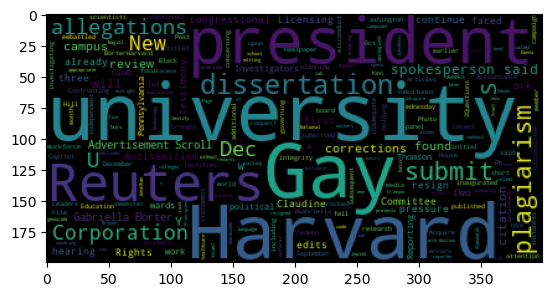

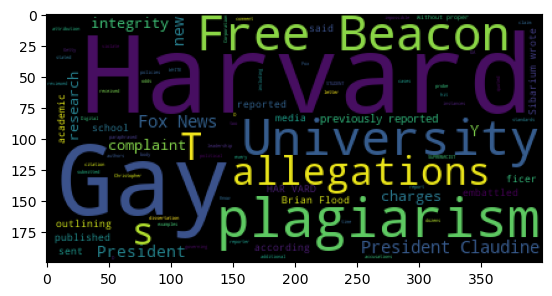

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.show()

generate_wordcloud(reuters)
generate_wordcloud(foxnews)

Reuters WordCloud - We can see the people or institutions involved are the most frequent words on this text, like "Gay", "University" and "Harvard", and Gay's role at Harvard as well with "president". "Plagiarism" is not one of the 5 most frequent words, but it is also highlighted to the right.   

Fox News WordCloud - "Free Beacon" is the main source of Fox News' article, so we see it as one of the most frequent words. In this WordCloud we can see thet "plagiarism" is one of the three most important words,right behing "Gay" and "Harvard". We can see in this article there is more emphasys in the "plagiarism" complaints. 